Here we will set the mrad to that highest interpolation factor and then keep it constant throughout the remaininder of the measurement 

In [1]:
%config InlineBackend.rc = {"figure.dpi": 72, "figure.figsize": (6.0, 4.0)}
%matplotlib inline

import abtem
import ase
import matplotlib.pyplot as plt
import numpy as np
from ase.io import read
from ase.visualize import view

[########################################] | 100% Completed | 3.58 ss


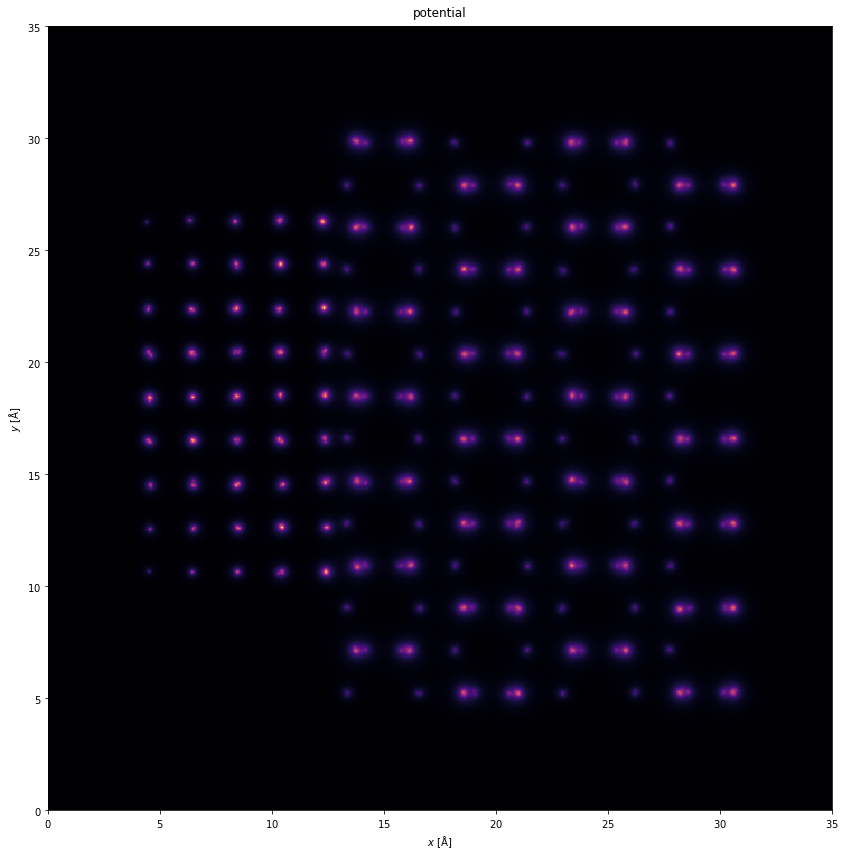

In [2]:
atoms = read(r"C:\Users\Joshu\Desktop\Final model\Tit_pd_fin.cfg")

frozen_phonons = abtem.FrozenPhonons(atoms, num_configs=10, sigmas=0.1, seed=100)

atoms_configuration = next(iter(frozen_phonons))

potential = abtem.Potential(
    frozen_phonons,
    sampling=0.05,
    #device="gpu",
    parametrization="lobato",
    projection="infinite"
)


fig, (ax1) = plt.subplots(1,figsize=(20, 12))

potential.show(ax=ax1, cmap='magma', title="potential")
fig.tight_layout()


In [3]:
s_matrix_3 = abtem.SMatrix(
    potential=potential,
    energy=200e3,
    semiangle_cutoff=30,
    interpolation=(3),
)

exit_waves_line = s_matrix_3.multislice(potential=potential)

sampling = abtem.transfer.nyquist_sampling(s_matrix_3.semiangle_cutoff, s_matrix_3.energy)

scan = abtem.GridScan(
    start=(0, 0),
    end=(1, 1),
    fractional=True,
    potential=potential,
    sampling=sampling,
)

bright = abtem.AnnularDetector(inner=0, outer=30)
maadf = abtem.AnnularDetector(inner=50, outer=120)
haadf = abtem.AnnularDetector(inner=75, outer=165)

all_detectors = [bright, maadf, haadf]

C:\Users\Joshu\anaconda3\envs\myenv\lib\site-packages\abtem\prism\s_matrix.py:1416: UserWarning: The interpolation factor does not exactly divide 'gpts', normalization may not be exactly preserved.
  warnings.warn(


[                                        ] | 1% Completed | 140.79 ms

C:\Users\Joshu\anaconda3\envs\myenv\lib\site-packages\abtem\prism\s_matrix.py:1416: UserWarning: The interpolation factor does not exactly divide 'gpts', normalization may not be exactly preserved.
  warnings.warn(


[########################################] | 100% Completed | 13m 59s


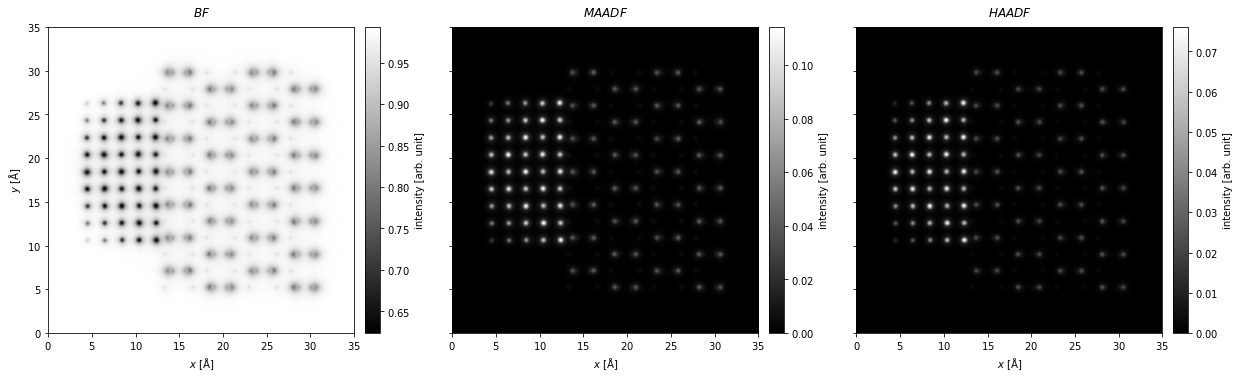

In [4]:
measurement_3 = s_matrix_3.scan(
    scan=scan,
    detectors=all_detectors,
).compute()

measurements = abtem.stack(measurement_3, ("BF", "MAADF", "HAADF"))

interpolated_measurement = measurements.interpolate(0.02)
interpolated_measurement.show(explode=True, cbar=True, cmap='gray', figsize=(20, 5));

plt.savefig('Pd_tit_inter.png')


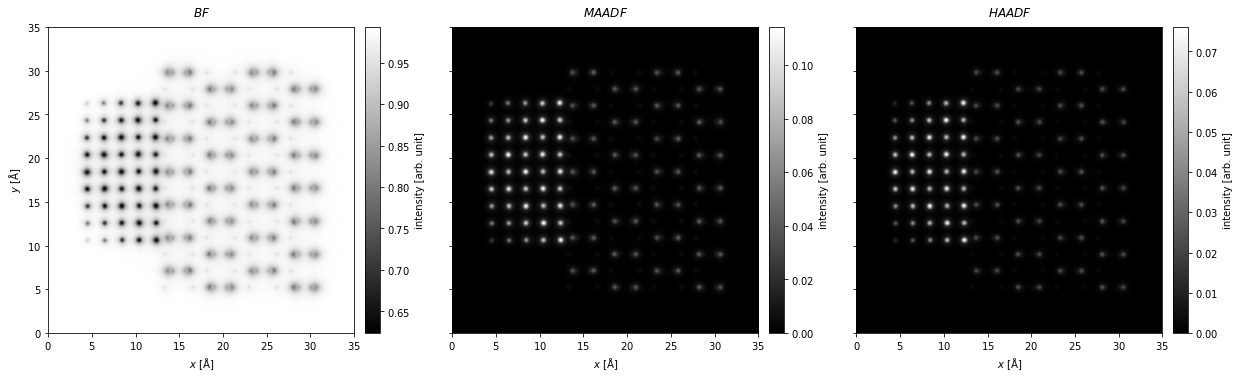

In [5]:
#Scanning at nyquist can make image pixelated. By interpolating images to a sampling of 0.1A/pix we can address this.

interpolated_measurement = measurements.interpolate(0.02)
interpolated_measurement.show(explode=True, cbar=True, cmap='gray', figsize=(20, 5));

plt.savefig('Pd_tit_inter.png')


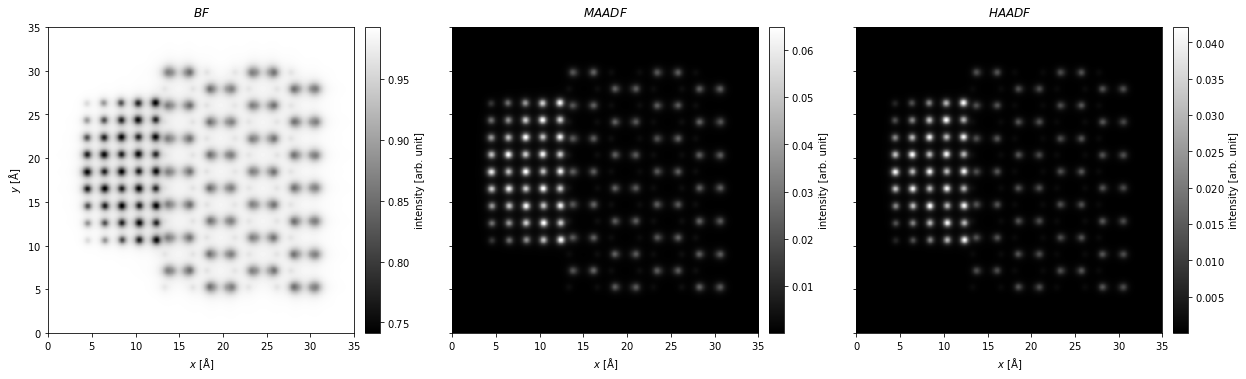

In [6]:

interpolated_measurement = measurements.interpolate(0.05).gaussian_filter(0.2)
interpolated_measurement.show(explode=True, cbar=True, cmap='gray', figsize=(20, 5));

plt.savefig('Pd_tit_inter_blur.png')

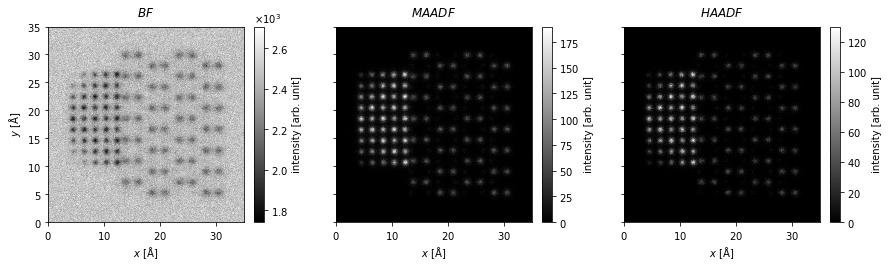

In [9]:
#Applies the electron dose of the imaging mode

noisy_measurements = interpolated_measurement.poisson_noise(dose_per_area=10e5)

noisy_measurements.show(
    explode=True,
    figsize=(14, 5),
    cbar=True,
    cmap='gray',
);

plt.savefig('Pd_tit_inter_blur_noise.png')

[########################################] | 100% Completed | 2.05 ss


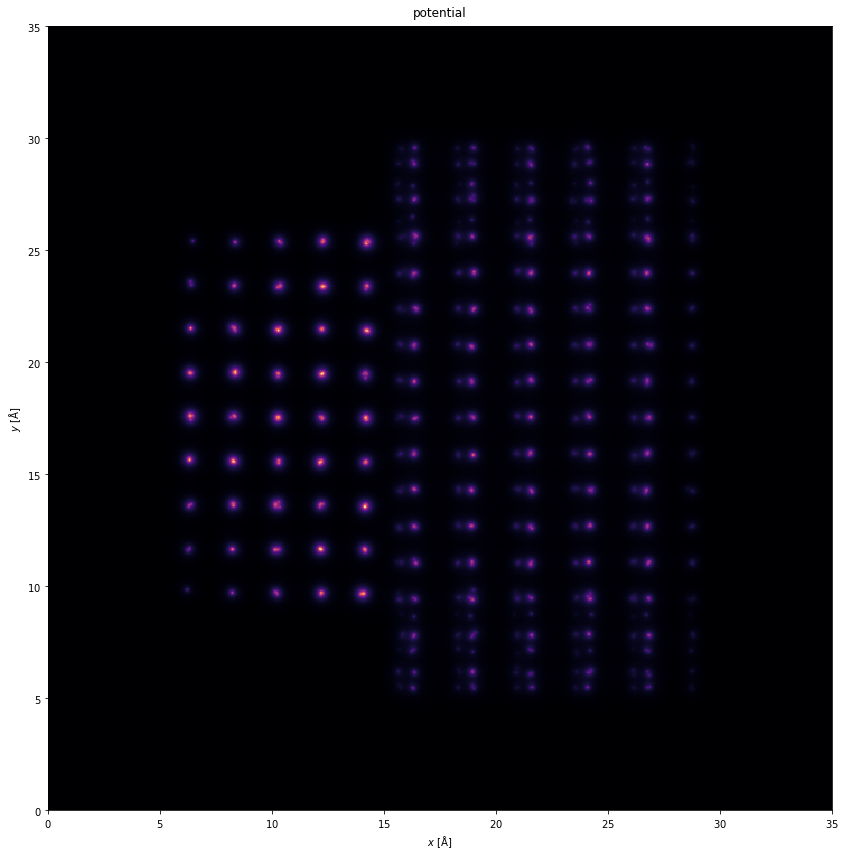

In [10]:
atoms = read(r"C:\Users\Joshu\Desktop\Final model\zno_fin.cfg")

frozen_phonons = abtem.FrozenPhonons(atoms, num_configs=10, sigmas=0.1, seed=100)

atoms_configuration = next(iter(frozen_phonons))

potential = abtem.Potential(
    frozen_phonons,
    sampling=0.05,
    #device="gpu",
    parametrization="lobato",
    projection="infinite"
)


fig, (ax1) = plt.subplots(1,figsize=(20, 12))

potential.show(ax=ax1, cmap='magma', title="potential")
fig.tight_layout()

In [11]:
s_matrix_3 = abtem.SMatrix(
    potential=potential,
    energy=200e3,
    semiangle_cutoff=30,
    interpolation=(3),
)

exit_waves_line = s_matrix_3.multislice(potential=potential)

sampling = abtem.transfer.nyquist_sampling(s_matrix_3.semiangle_cutoff, s_matrix_3.energy)

scan = abtem.GridScan(
    start=(0, 0),
    end=(1, 1),
    fractional=True,
    potential=potential,
    sampling=sampling,
)

bright = abtem.AnnularDetector(inner=0, outer=30)
maadf = abtem.AnnularDetector(inner=50, outer=120)
haadf = abtem.AnnularDetector(inner=75, outer=165)

all_detectors = [bright, maadf, haadf]

C:\Users\Joshu\anaconda3\envs\myenv\lib\site-packages\abtem\prism\s_matrix.py:1416: UserWarning: The interpolation factor does not exactly divide 'gpts', normalization may not be exactly preserved.
  warnings.warn(


[                                        ] | 1% Completed | 148.85 ms

C:\Users\Joshu\anaconda3\envs\myenv\lib\site-packages\abtem\prism\s_matrix.py:1416: UserWarning: The interpolation factor does not exactly divide 'gpts', normalization may not be exactly preserved.
  warnings.warn(


[########################################] | 100% Completed | 14m 8ss


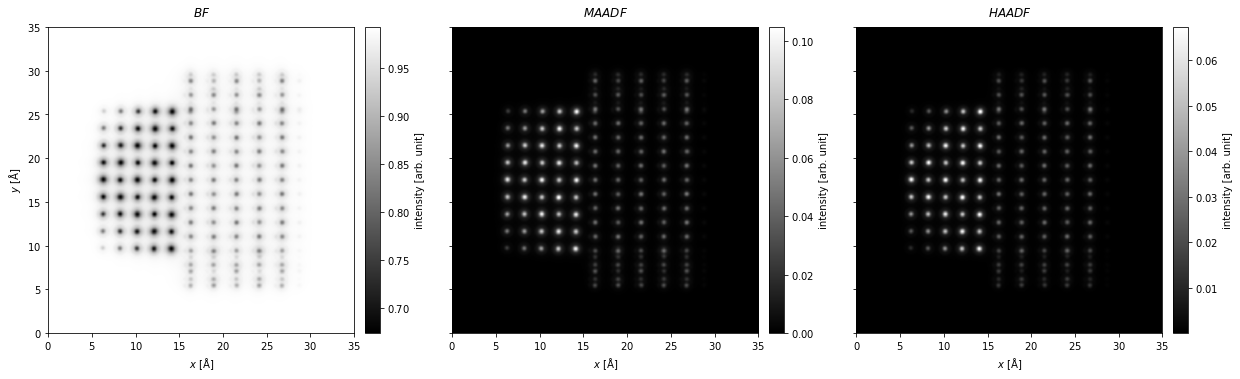

In [12]:
measurement_3 = s_matrix_3.scan(
    scan=scan,
    detectors=all_detectors,
).compute()

measurements = abtem.stack(measurement_3, ("BF", "MAADF", "HAADF"))

interpolated_measurement = measurements.interpolate(0.02)
interpolated_measurement.show(explode=True, cbar=True, cmap='gray', figsize=(20, 5));

plt.savefig('Pd_zno_inter.png')

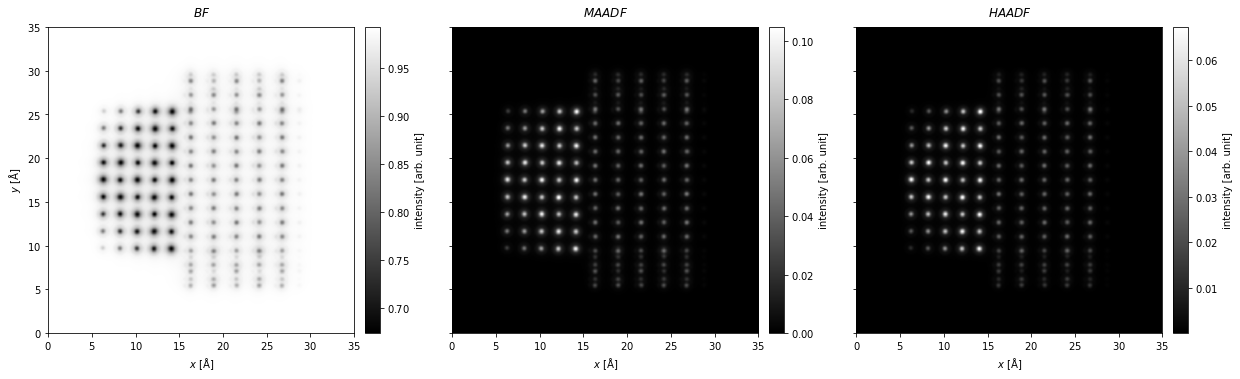

In [13]:
#Scanning at nyquist can make image pixelated. By interpolating images to a sampling of 0.1A/pix we can address this.

interpolated_measurement = measurements.interpolate(0.02)
interpolated_measurement.show(explode=True, cbar=True, cmap='gray', figsize=(20, 5));

plt.savefig('Pd_zno_inter.png')


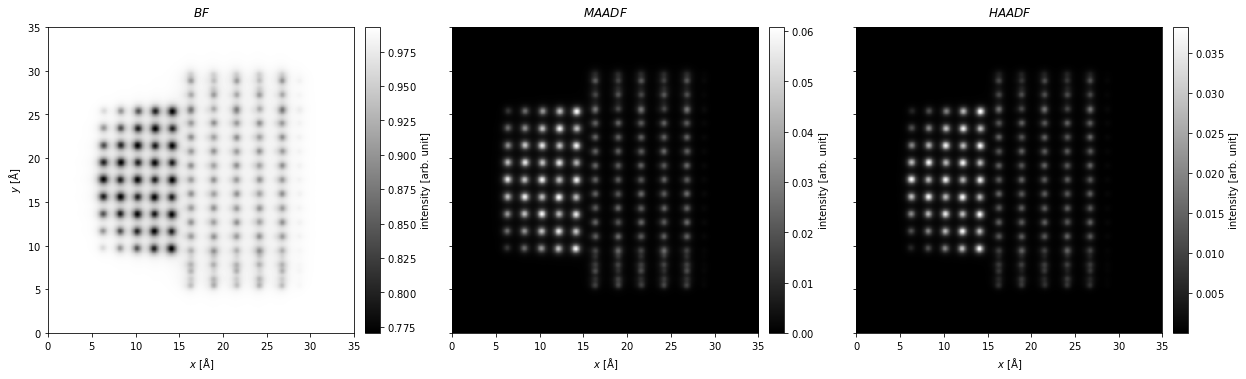

In [14]:

interpolated_measurement = measurements.interpolate(0.05).gaussian_filter(0.2)
interpolated_measurement.show(explode=True, cbar=True, cmap='gray', figsize=(20, 5));

plt.savefig('Pd_zno_inter_blur.png')

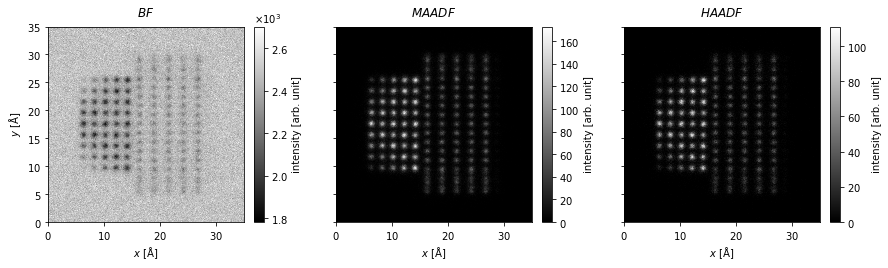

In [16]:
#Applies the electron dose of the imaging mode

noisy_measurements = interpolated_measurement.poisson_noise(dose_per_area=10e5)

noisy_measurements.show(
    explode=True,
    figsize=(14, 5),
    cbar=True,
    cmap='gray',
);

plt.savefig('Pd_zno_inter_blur_noise.png')